In [1]:
! dir D:\ownCloud\LX 2.0\kai_compare_lx1_v2\20210126_from_Pavel_20201016_FTMSMS_NH4_neg_LX2try_find_PC\additional_MFQL\redo_all

The system cannot find the path specified.


In [2]:
from pathlib import Path
# from https://cloud.mpi-cbg.de/index.php/apps/files/?dir=/LX%202.0/Test%20sample%20set&fileid=14859349

In [3]:
p = Path(r'D:\ownCloud\LX 2.0\Test_sample_set')

In [4]:
mzmls = list(p.glob("*.mzml"))

In [5]:
mzmls

[WindowsPath('D:/ownCloud/LX 2.0/Test_sample_set/28-03-2018_Spartans_Pilot_03_Bl_01_01.mzML'),
 WindowsPath('D:/ownCloud/LX 2.0/Test_sample_set/28-03-2018_Spartans_Pilot_04_Bl_01_02.mzML'),
 WindowsPath('D:/ownCloud/LX 2.0/Test_sample_set/28-03-2018_Spartans_Pilot_05_QC_01.mzML'),
 WindowsPath('D:/ownCloud/LX 2.0/Test_sample_set/28-03-2018_Spartans_Pilot_06_QC_02.mzML'),
 WindowsPath('D:/ownCloud/LX 2.0/Test_sample_set/28-03-2018_Spartans_Pilot_07_5475_01.mzML'),
 WindowsPath('D:/ownCloud/LX 2.0/Test_sample_set/28-03-2018_Spartans_Pilot_08_5475_02.mzML'),
 WindowsPath('D:/ownCloud/LX 2.0/Test_sample_set/28-03-2018_Spartans_Pilot_09_5832_01.mzML'),
 WindowsPath('D:/ownCloud/LX 2.0/Test_sample_set/28-03-2018_Spartans_Pilot_10_5832_02.mzML'),
 WindowsPath('D:/ownCloud/LX 2.0/Test_sample_set/28-03-2018_Spartans_Pilot_11_5868_01.mzML'),
 WindowsPath('D:/ownCloud/LX 2.0/Test_sample_set/28-03-2018_Spartans_Pilot_12_5868_02.mzML'),
 WindowsPath('D:/ownCloud/LX 2.0/Test_sample_set/28-03-2018_Sp

In [6]:
from ms_deisotope import MSFileLoader

In [7]:
import pandas as pd
def path2df(path, time_start=0, time_end=float("inf")):
    dfs = []
    with MSFileLoader(str(path)) as r:
        r.get_scan_by_time(time_start / 60)
        r.start_from_scan(r.get_scan_by_time(time_start / 60).id)
        for b in r:
            if time_start / 60 > b.precursor.scan_time > time_end / 60:
                break
            a = b.precursor.arrays
            df = pd.DataFrame({"mz": a.mz, "inty": a.intensity, 'stem': path.stem})
            df["scan_id"] = b.precursor.scan_id
            df["filter_string"] = b.precursor.annotations["filter string"]
            df["precursor_id"] = None
            dfs.append(df)
            # for p in b.products:
            #     if time_start > p.scan_time > time_end:
            #         continue
            #     a = p.arrays
            #     df = pd.DataFrame({"mz": a.mz, "inty": a.intensity})
            #     df["scan_id"] = p.scan_id  # TODO  make them categoriacal?
            #     df["filter_string"] = p.annotations["filter string"]
            #     df["precursor_id"] = b.precursor.scan_id
            #     df.set_index(["scan_id", "filter_string"], append=True, inplace=True)
            #     dfs.append(df)
    df = pd.concat(dfs)
    # df.set_index(
    #     {
    #         "path_stem": path.stem,
    #         "scan_id": b.precursor.scan_id,
    #         "filter_string": b.precursor.annotations["filter string"],
    #         "precursor_id": None,
    #     },
    #     append=True,
    #     inplace=True,
    # )
    # df.attrs = {"path": path}
    # logging.debug(f"from {path} made dataframe...")
    # logging.debug(f"{df}")

    return df

In [8]:
df = pd.concat((path2df(mzml) for mzml in mzmls))

In [9]:
df_ms1 = df.loc[(df.filter_string.str.contains(' ms ')) & ~(df.filter_string.str.contains(' SIM '))]
df_ms1

,mz,inty,stem,scan_id,filter_string,precursor_id
0,396.025288,0.0,28-03-2018_Spartans_Pilot_03_Bl_01_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
1,396.026223,0.0,28-03-2018_Spartans_Pilot_03_Bl_01_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
2,396.027157,0.0,28-03-2018_Spartans_Pilot_03_Bl_01_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
3,401.255426,0.0,28-03-2018_Spartans_Pilot_03_Bl_01_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
4,401.256379,0.0,28-03-2018_Spartans_Pilot_03_Bl_01_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
...,...,...,...,...,...,...
28031,999.876218,0.0,28-03-2018_Spartans_Pilot_Spray_Mix_02,controllerType=0 controllerNumber=1 scan=544,FTMS - p NSI Full lock ms [350.0000-1000.0000],None
28032,999.879966,0.0,28-03-2018_Spartans_Pilot_Spray_Mix_02,controllerType=0 controllerNumber=1 scan=544,FTMS - p NSI Full lock ms [350.0000-1000.0000],None
28033,1010.070889,0.0,28-03-2018_Spartans_Pilot_Spray_Mix_02,controllerType=0 controllerNumber=1 scan=544,FTMS - p NSI Full lock ms [350.0000-1000.0000],None
28034,1010.074695,0.0,28-03-2018_Spartans_Pilot_Spray_Mix_02,controllerType=0 controllerNumber=1 scan=544,FTMS - p NSI Full lock ms [350.0000-1000.0000],None


In [10]:
df_ms1 =  df.loc[df.inty>0]
df_ms1

,mz,inty,stem,scan_id,filter_string,precursor_id
6,401.261145,206.265427,28-03-2018_Spartans_Pilot_03_Bl_01_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
13,402.205399,270.690460,28-03-2018_Spartans_Pilot_03_Bl_01_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
20,403.226907,159.128479,28-03-2018_Spartans_Pilot_03_Bl_01_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
27,404.311008,2921.005859,28-03-2018_Spartans_Pilot_03_Bl_01_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
35,404.813800,1108.464600,28-03-2018_Spartans_Pilot_03_Bl_01_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
...,...,...,...,...,...,...
1960,704.558968,791.470947,28-03-2018_Spartans_Pilot_Spray_Mix_02,controllerType=0 controllerNumber=1 scan=909,FTMS - p NSI SIM lock ms [685.0000-705.0000],None
1967,704.594656,81.334976,28-03-2018_Spartans_Pilot_Spray_Mix_02,controllerType=0 controllerNumber=1 scan=909,FTMS - p NSI SIM lock ms [685.0000-705.0000],None
1974,704.736696,806.340515,28-03-2018_Spartans_Pilot_Spray_Mix_02,controllerType=0 controllerNumber=1 scan=909,FTMS - p NSI SIM lock ms [685.0000-705.0000],None
1981,704.945143,301.630341,28-03-2018_Spartans_Pilot_Spray_Mix_02,controllerType=0 controllerNumber=1 scan=909,FTMS - p NSI SIM lock ms [685.0000-705.0000],None


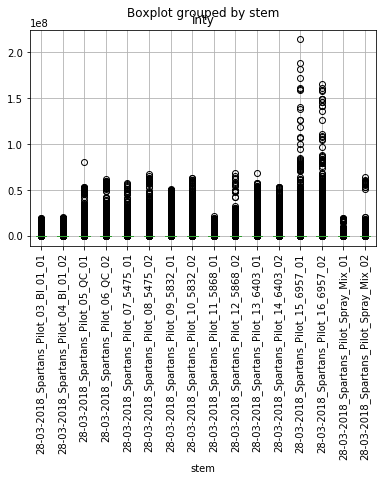

In [12]:
df_ms1.boxplot(column='inty', by='stem', rot=90)


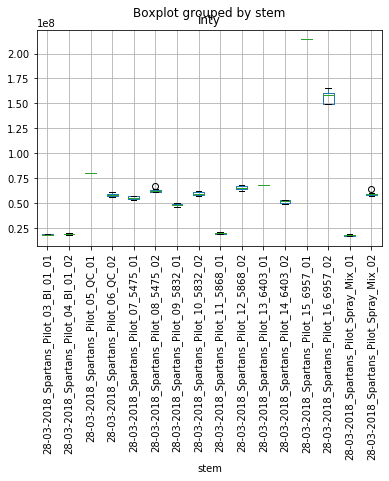

In [16]:
mask = df_ms1.inty / df_ms1.groupby('stem')['inty'].transform('max') > 0.9
df_ms1.loc[mask].boxplot(column='inty', by='stem', rot=90)

In [103]:

res = [(s, s_df.groupby('scan_id')['inty'].mean().mean() ) for s, s_df in df_ms1.groupby('stem')] # / s_df.groupby('scan_id')['mz'].count().shape[0]
sorted(res, key=lambda x: x[1])

[('28-03-2018_Spartans_Pilot_Spray_Mix_01', 25746.865853490526),
 ('28-03-2018_Spartans_Pilot_Spray_Mix_02', 45749.25035818782),
 ('28-03-2018_Spartans_Pilot_04_Bl_01_02', 46083.25621213808),
 ('28-03-2018_Spartans_Pilot_03_Bl_01_01', 55678.16457319204),
 ('28-03-2018_Spartans_Pilot_11_5868_01', 77918.13200426297),
 ('28-03-2018_Spartans_Pilot_12_5868_02', 119612.9581367402),
 ('28-03-2018_Spartans_Pilot_07_5475_01', 191687.69783989128),
 ('28-03-2018_Spartans_Pilot_05_QC_01', 227105.23077515283),
 ('28-03-2018_Spartans_Pilot_08_5475_02', 232072.0078032469),
 ('28-03-2018_Spartans_Pilot_06_QC_02', 235427.67112303973),
 ('28-03-2018_Spartans_Pilot_14_6403_02', 237512.62192144277),
 ('28-03-2018_Spartans_Pilot_13_6403_01', 245276.69170156022),
 ('28-03-2018_Spartans_Pilot_09_5832_01', 260447.86828837296),
 ('28-03-2018_Spartans_Pilot_10_5832_02', 291411.5720917207),
 ('28-03-2018_Spartans_Pilot_16_6957_02', 335450.1786669713),
 ('28-03-2018_Spartans_Pilot_15_6957_01', 339157.4221490129)]

[('28-03-2018_Spartans_Pilot_Spray_Mix_01', 8409.836006164689),
 ('28-03-2018_Spartans_Pilot_04_Bl_01_02', 16815.677809005967),
 ('28-03-2018_Spartans_Pilot_03_Bl_01_01', 19915.781694141588),
 ('28-03-2018_Spartans_Pilot_11_5868_01', 32614.99834878038),
 ('28-03-2018_Spartans_Pilot_Spray_Mix_02', 41697.44373199799),
 ('28-03-2018_Spartans_Pilot_07_5475_01', 42677.25491867875),
 ('28-03-2018_Spartans_Pilot_14_6403_02', 50873.45105319734),
 ('28-03-2018_Spartans_Pilot_12_5868_02', 55604.69257399417),
 ('28-03-2018_Spartans_Pilot_05_QC_01', 61011.53661007676),
 ('28-03-2018_Spartans_Pilot_10_5832_02', 63672.14352437375),
 ('28-03-2018_Spartans_Pilot_08_5475_02', 71621.85763648643),
 ('28-03-2018_Spartans_Pilot_06_QC_02', 74051.26711188546),
 ('28-03-2018_Spartans_Pilot_13_6403_01', 76705.38638046454),
 ('28-03-2018_Spartans_Pilot_09_5832_01', 77664.55852303439),
 ('28-03-2018_Spartans_Pilot_15_6957_01', 106129.78165657056),
 ('28-03-2018_Spartans_Pilot_16_6957_02', 109416.7138602158)]

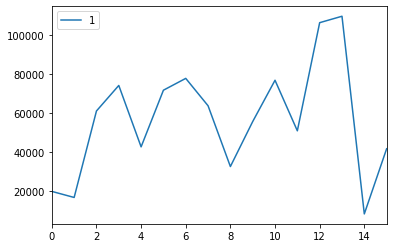

In [104]:
res = [(s, s_df.inty.mean()) for s, s_df in df_ms1.groupby('stem')]
pd.DataFrame(res).plot()
sorted(res, key=lambda x: x[1])

In [123]:
tmp = df_ms1.groupby('stem').get_group('28-03-2018_Spartans_Pilot_11_5868_01') #28-03-2018_Spartans_Pilot_11_5868_01 28-03-2018_Spartans_Pilot_Spray_Mix_02

In [124]:
# mask = tmp.inty / tmp.groupby('scan_id')['inty'].transform('max') > 0.1
# tmp.loc[mask].inty.sum()

5546906089.620483

In [ ]:
tmp.boxplot()


,mz,inty,stem,scan_id,filter_string,precursor_id
6,402.398740,11.684825,28-03-2018_Spartans_Pilot_Spray_Mix_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
13,407.994390,12.718649,28-03-2018_Spartans_Pilot_Spray_Mix_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
20,419.093632,12.731655,28-03-2018_Spartans_Pilot_Spray_Mix_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
27,441.533650,12.981566,28-03-2018_Spartans_Pilot_Spray_Mix_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
34,445.030601,13.943912,28-03-2018_Spartans_Pilot_Spray_Mix_01,controllerType=0 controllerNumber=1 scan=1,FTMS + p NSI Full lock ms [400.0000-1000.0000],None
...,...,...,...,...,...,...
2498,464.345777,151.534271,28-03-2018_Spartans_Pilot_Spray_Mix_01,controllerType=0 controllerNumber=1 scan=810,FTMS - p NSI SIM lock ms [445.0000-465.0000],None
2500,464.358827,156.677856,28-03-2018_Spartans_Pilot_Spray_Mix_01,controllerType=0 controllerNumber=1 scan=810,FTMS - p NSI SIM lock ms [445.0000-465.0000],None
2507,464.379919,290.989716,28-03-2018_Spartans_Pilot_Spray_Mix_01,controllerType=0 controllerNumber=1 scan=810,FTMS - p NSI SIM lock ms [445.0000-465.0000],None
2515,464.849626,339.025299,28-03-2018_Spartans_Pilot_Spray_Mix_01,controllerType=0 controllerNumber=1 scan=810,FTMS - p NSI SIM lock ms [445.0000-465.0000],None


In [18]:
import streamlit as st

In [19]:
st.title('Set Sample type ')

2022-01-19 15:18:13.532 
  command:

    streamlit run C:\Users\mirandaa\Anaconda3\envs\lx128_p3_dev\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [21]:
! dir  .

 Volume in drive D is DATA
 Volume Serial Number is 62B3-38E3

 Directory of d:\fork\isas_lipidxplorer

18.01.2022  16:44    <DIR>          .
18.01.2022  16:44    <DIR>          ..
11.10.2021  10:55               128 .gitattributes
13.10.2021  13:53    <DIR>          .github
13.10.2021  13:20               194 .gitignore
22.12.2021  15:34    <DIR>          .pytest_cache
13.10.2021  14:49    <DIR>          build
13.10.2021  14:55             8,636 CHANGELOG
13.10.2021  13:53                 0 conftest.py
11.10.2021  10:55               770 COPYRIGHT.txt
13.10.2021  14:54    <DIR>          dist
13.10.2021  14:54       338,892,550 dist.zip
13.10.2021  13:53               872 Dockerfile
05.11.2021  16:58             4,866 environment.yml
13.10.2021  13:53             4,347 files_ui.py
21.12.2021  11:27           307,380 find_bad_clusting.ipynb
22.12.2021  18:54        16,891,553 find_bad_clustingbenchmark.ipynb
13.10.2021  13:53            13,279 generateOptions.py
13.10.2021  13:53    <DI